In [1]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
# import seaborn as sns
%matplotlib inline

train_csv_file_path = "D:\\ACA semester 7\\CS4622 - Machine Learning\\ML-Project\\Data\\layer12\\train.csv"
valid_csv_file_path = "D:\\ACA semester 7\\CS4622 - Machine Learning\\ML-Project\\Data\\layer12\\valid.csv"
test_csv_file_path = "D:\\ACA semester 7\\CS4622 - Machine Learning\\ML-Project\\Data\\layer12\\test.csv"

# Train dataset

In [2]:
train_df = pd.read_csv(train_csv_file_path)
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.031138,0.079892,0.157382,-0.014636,-0.051778,-0.021332,-0.073593,-0.005386,-0.212557,0.099683,...,-0.085248,-0.096007,-0.000766,0.021399,-0.041432,0.094806,45,NaN,1,6
1,0.113040,0.175731,0.217741,-0.196254,-0.010129,-0.030586,0.067114,-0.072412,-0.239192,0.104741,...,-0.090283,-0.053885,-0.010967,0.062209,-0.122958,0.192949,45,NaN,1,6
2,0.048570,0.091281,0.160776,-0.150937,0.020115,0.044117,-0.050092,-0.045661,-0.155332,0.117206,...,-0.021524,-0.008411,-0.006248,0.031468,-0.056915,0.154731,45,NaN,1,6
3,0.039212,0.118388,0.173831,-0.096659,-0.008702,0.061298,0.008974,-0.003277,-0.065046,0.095480,...,-0.071936,-0.023120,-0.007812,0.057600,-0.121892,0.072796,45,NaN,1,6
4,0.056019,0.170639,0.157917,-0.228605,-0.065965,-0.088732,-0.082243,-0.080568,-0.341500,0.142430,...,-0.155621,-0.079447,0.015316,0.127726,-0.151966,0.169634,45,NaN,1,6


In [3]:
# get type of each column
train_df.dtypes

feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
                ...   
feature_768    float64
label_1          int64
label_2        float64
label_3          int64
label_4          int64
Length: 772, dtype: object

## Renaming Labels

*   Since the labels are in 'label_1', 'label_2' ... format, I will be renaming them to 'speaker_ID', 'speaker_age', ... format


In [4]:
train_df.rename(columns={'label_1': 'speaker_ID', 'label_2': 'speaker_age', 'label_3': 'speaker_gender', 'label_4': 'speaker_accent'}, inplace=True)

In [5]:
train_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,speaker_ID,speaker_age,speaker_gender,speaker_accent
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,0.042487,0.068749,0.145547,-0.070646,-0.013539,0.003395,-0.041282,-0.028283,-0.106602,0.053686,...,-0.022102,-0.044743,-0.004380,0.049072,-0.028722,0.075717,30.498843,27.975107,0.799299,5.997125
std,0.048918,0.046354,0.065332,0.046671,0.027635,0.031248,0.026479,0.029632,0.070775,0.030945,...,0.053250,0.031361,0.025829,0.050536,0.032622,0.044879,17.328389,5.735913,0.400532,2.375567
min,-0.079594,-0.062608,-0.048545,-0.307243,-0.178347,-0.194771,-0.197551,-0.304828,-0.421257,-0.049723,...,-0.253255,-0.264549,-0.137827,-0.117697,-0.302399,-0.090777,1.000000,22.000000,0.000000,0.000000
25%,0.009979,0.037225,0.100677,-0.088834,-0.027810,-0.010617,-0.056682,-0.044344,-0.135110,0.033236,...,-0.042332,-0.056918,-0.018848,0.012599,-0.045226,0.045309,15.000000,25.000000,1.000000,6.000000
50%,0.024445,0.056119,0.123554,-0.057386,-0.011423,0.006173,-0.041501,-0.025805,-0.080715,0.045567,...,-0.007960,-0.037407,-0.004701,0.033121,-0.022919,0.064875,30.000000,27.000000,1.000000,6.000000
75%,0.058410,0.086358,0.173234,-0.039661,0.001544,0.021250,-0.026559,-0.009324,-0.057873,0.065670,...,0.012116,-0.024179,0.010218,0.072599,-0.006335,0.097642,46.000000,30.000000,1.000000,6.000000
max,0.274146,0.332288,0.454182,0.059362,0.196950,0.213127,0.124194,0.105714,0.192121,0.252320,...,0.209455,0.054555,0.215375,0.376414,0.125857,0.416291,60.000000,61.000000,1.000000,13.000000


## Check for null/NaN values in all columns



In [6]:
train_df.isna().any()

# Based on below output we can see that there are missing values in the speaker_age column of the dataset.
# Let's now check whether that is the only column with missing values.

feature_1         False
feature_2         False
feature_3         False
feature_4         False
feature_5         False
                  ...  
feature_768       False
speaker_ID        False
speaker_age        True
speaker_gender    False
speaker_accent    False
Length: 772, dtype: bool

In [7]:
train_df.isnull().sum()

feature_1           0
feature_2           0
feature_3           0
feature_4           0
feature_5           0
                 ... 
feature_768         0
speaker_ID          0
speaker_age       480
speaker_gender      0
speaker_accent      0
Length: 772, dtype: int64

In [8]:
train_df.isnull().sum().sum()

# Based on the above and below outputs, we can see that there are 480 missing values 'only' in the speaker_age column. No missing values in other columns.

480

In [9]:
print("train dataset shape:", train_df.shape)
print("null values row count: ", train_df.isnull().sum().sum())
print("null values row count percentage: ", (train_df.isnull().sum().sum() / train_df.shape[0]) * 100)

train dataset shape: (28520, 772)
null values row count:  480
null values row count percentage:  1.6830294530154277


In [10]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_age.value_counts()

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: speaker_age, dtype: int64

## Handling Null values (Replace with Mean)

In [11]:
# Let's get the mean of the speaker_age column.
speaker_age_mean = train_df.speaker_age.mean()
print("mean: ", speaker_age_mean)

# round it to nearest int
speaker_age_mean = round(speaker_age_mean)
print("mean (rounded):", speaker_age_mean)

mean:  27.975106990014265
mean (rounded): 28


In [12]:
# Let's now fill the missing values with the mean value.
train_df.speaker_age.fillna(speaker_age_mean, inplace=True)

In [13]:
train_df.speaker_age.isna().sum().sum()

0

## Checking each Label distribution

### Speaker age

In [14]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_age.value_counts()

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
28.0    2379
24.0    1906
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: speaker_age, dtype: int64

In [15]:
# Number os unique values in speaker age column
train_df.speaker_age.nunique()

17

<Axes: >

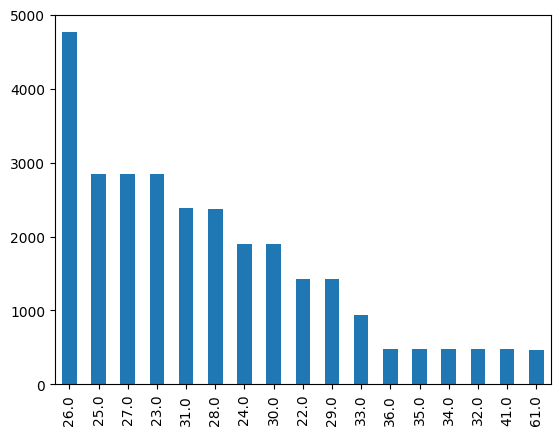

In [16]:
train_df.speaker_age.value_counts().plot.bar()

In [17]:
# There is a slight class imbalance issue based on above outputs. As a solution we can use RandomForrestClassifier with class_weight='balanced' parameter.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# use averaged F1 score 

### Speaker ID

In [18]:
# Let's now check the distribution of the speaker_ID column.
train_df.speaker_ID.value_counts()

12    485
35    484
26    483
60    482
24    482
25    481
59    481
10    481
54    481
45    480
41    480
9     480
2     479
42    479
47    479
6     479
56    479
34    478
52    478
3     478
14    478
33    478
43    477
1     477
13    477
20    477
23    477
30    476
51    476
32    476
53    476
22    476
38    476
49    476
55    475
28    474
8     474
40    474
48    474
21    474
4     474
39    473
17    473
7     473
15    472
58    472
5     471
27    471
31    470
19    469
11    469
46    469
29    469
36    468
16    468
50    467
37    467
44    467
57    466
18    465
Name: speaker_ID, dtype: int64

In [19]:
# Let's get num of unique values in speaker_ID column.
train_df.speaker_ID.nunique()

60

<Axes: >

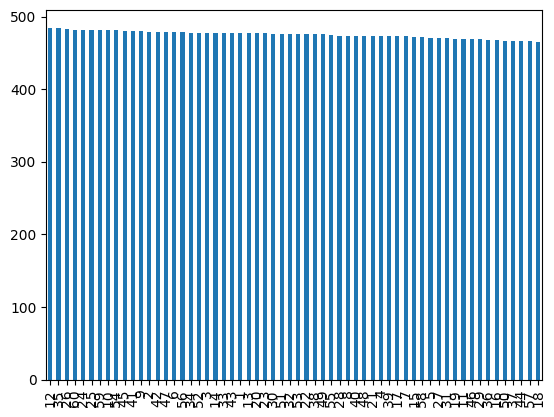

In [20]:
train_df.speaker_ID.value_counts().plot.bar()

# There is no significant class imbalance issue based on above outputs for the Speaker_ID column

### Speaker gender

In [21]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_gender.value_counts()

1    22796
0     5724
Name: speaker_gender, dtype: int64

In [22]:
train_df.speaker_gender.nunique()

2

<Axes: >

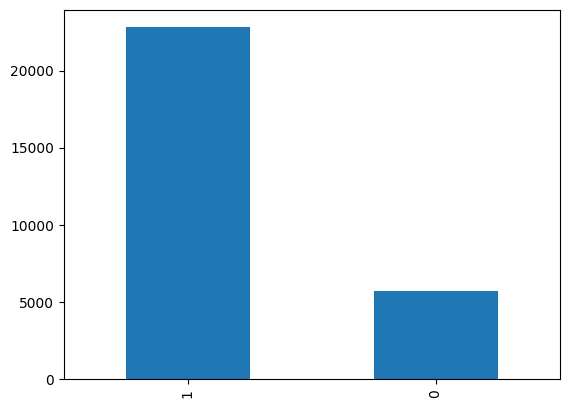

In [23]:
train_df.speaker_gender.value_counts().plot.bar()

# There is a significant class imbalance issue in speaker_gender column. As a solution we can use RandomForrestClassifier with class_weight='balanced' parameter.
# Also when splitting the dataset, I will use the stratisfied sampling technique.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# NOte; print classification report | use averaged/macro F1

# # Define the steps in your pipeline
# steps = [
#     ('scaler', StandardScaler()),  # Standardize the features
#     ('oversampler', SMOTE(random_state=42)),  # Apply SMOTE for oversampling
#     ('pca', PCA(n_components=0.95)),  # Apply PCA for dimensionality reduction
#     ('xgb', XGBClassifier(scale_pos_weight=np.sqrt(np.sum(y == 0) / np.sum(y == 1))))  # XGBoost Classifier
# ]

# The parameter scale_pos_weight is used in XGBoost to address class imbalance. It's an important hyperparameter to consider when working with imbalanced datasets. The specific value provided (np.sqrt(np.sum(y == 0) / np.sum(y == 1))) is a common heuristic used for setting scale_pos_weight, but it should be chosen based on the characteristics of your dataset.

### Speaker accent

In [24]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_accent.value_counts()

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: speaker_accent, dtype: int64

In [25]:
train_df.speaker_accent.nunique()

14

<Axes: >

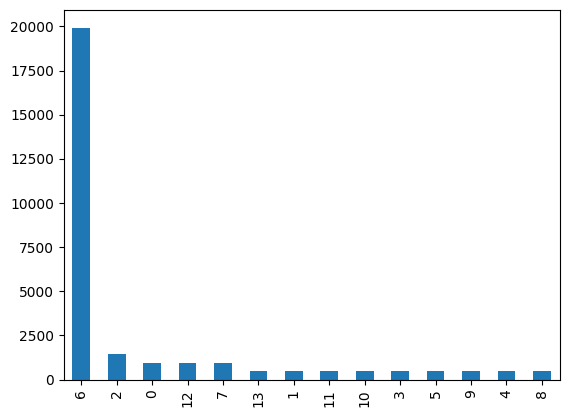

In [26]:
train_df.speaker_accent.value_counts().plot.bar()   

# There is a significant class imbalance issue in speaker_accents column. As a solution we can use RandomForrestClassifier with class_weight='balanced' parameter.
# Also when splitting the dataset, I will use the stratisfied sampling technique.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# use avraged F1/macro F1

# <!-- # Make predictions on the test set -->
# y_pred = classifier_pipeline.predict(X_test)

# <!-- # Generate a classification report -->
# report = classification_report(y_test, y_pred)

# <!-- # Print the classification report -->
# print("Classification Report:\n", report)

# Validation dataset

In [27]:
valid_df = pd.read_csv(valid_csv_file_path)
valid_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.153978,0.503276,0.022196,0.226684,0.466179,0.154995,0.195452,-0.288972,-0.297589,-0.008409,...,-0.503624,-0.056849,-0.117077,0.168611,0.373346,0.037188,45,NaN,1,6
1,0.056877,0.261613,0.050610,0.097744,0.322375,-0.011609,0.201331,-0.194763,-0.194228,-0.094267,...,-0.442110,0.008424,-0.067920,0.165600,0.333104,-0.270913,45,NaN,1,6
2,0.225439,0.350977,-0.295782,0.280168,0.705114,0.020545,0.390878,-0.322853,0.071575,0.013803,...,-0.380124,-0.089572,-0.023344,0.194312,0.269537,-0.292029,45,NaN,1,6
3,0.288556,0.513905,-0.205246,0.279660,0.469121,0.068339,0.131205,-0.338951,-0.270848,0.007799,...,-0.529678,-0.093194,-0.148418,0.405543,0.438906,-0.055119,45,NaN,1,6
4,0.165176,0.312492,-0.217504,0.259960,0.568979,-0.093011,0.257977,-0.277132,-0.172113,-0.025929,...,-0.504997,-0.108256,0.036867,0.267815,0.245041,0.117444,45,NaN,1,6


In [28]:
# get type of each column
valid_df.dtypes

feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
                ...   
feature_768    float64
label_1          int64
label_2        float64
label_3          int64
label_4          int64
Length: 772, dtype: object

## Renaming Labels

*   Since the labels are in 'label_1', 'label_2' ... format, I will be renaming them to 'speaker_ID', 'speaker_age', ... format


In [29]:
valid_df.rename(columns={'label_1': 'speaker_ID', 'label_2': 'speaker_age', 'label_3': 'speaker_gender', 'label_4': 'speaker_accent'}, inplace=True)

In [30]:
valid_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,speaker_ID,speaker_age,speaker_gender,speaker_accent
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,736.000000,750.000000,750.000000
mean,0.138566,0.326396,-0.105575,0.247640,0.473704,-0.058701,0.224979,-0.228412,-0.072824,-0.028374,...,-0.333159,-0.044704,-0.079132,0.184085,0.323799,-0.183099,30.085333,28.330163,0.810667,6.117333
std,0.086762,0.094890,0.152134,0.103347,0.135680,0.101014,0.117435,0.082237,0.139228,0.081750,...,0.144875,0.072396,0.064973,0.135451,0.158224,0.135559,17.489060,6.518500,0.392035,2.227895
min,-0.117159,-0.209349,-0.550758,-0.104930,-0.124913,-0.366478,-0.062692,-0.496261,-0.471700,-0.324631,...,-0.799173,-0.304076,-0.343493,-0.154304,-0.153001,-0.589591,1.000000,22.000000,0.000000,0.000000
25%,0.077579,0.270306,-0.207213,0.174754,0.396440,-0.123927,0.145534,-0.283383,-0.174644,-0.078954,...,-0.432297,-0.092119,-0.118917,0.095191,0.213669,-0.271198,15.000000,25.000000,1.000000,6.000000
50%,0.133337,0.328736,-0.096796,0.256077,0.488115,-0.057681,0.214558,-0.227015,-0.061655,-0.029001,...,-0.338127,-0.041534,-0.079149,0.172080,0.333834,-0.186795,29.000000,27.000000,1.000000,6.000000
75%,0.188513,0.390611,0.009080,0.322712,0.566803,0.004064,0.304288,-0.171806,0.031568,0.027306,...,-0.252013,-0.000177,-0.035977,0.273870,0.448331,-0.085947,45.000000,30.000000,1.000000,6.000000
max,0.424073,0.573708,0.301080,0.657954,0.819958,0.279770,0.543212,0.034650,0.337088,0.193899,...,0.351320,0.220994,0.244460,0.591306,0.649717,0.209976,60.000000,61.000000,1.000000,13.000000


## Check for null/NaN values in all columns



In [31]:
valid_df.isna().any()

# Based on below output we can see that there are missing values in the speaker_age column of the dataset.
# Let's now check whether that is the only column with missing values.

feature_1         False
feature_2         False
feature_3         False
feature_4         False
feature_5         False
                  ...  
feature_768       False
speaker_ID        False
speaker_age        True
speaker_gender    False
speaker_accent    False
Length: 772, dtype: bool

In [32]:
valid_df.isnull().sum()

feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_5          0
                  ..
feature_768        0
speaker_ID         0
speaker_age       14
speaker_gender     0
speaker_accent     0
Length: 772, dtype: int64

In [33]:
valid_df.isnull().sum().sum()

# Based on the above and below outputs, we can see that there are 480 missing values 'only' in the speaker_age column. No missing values in other columns.

14

In [34]:
print("validation dataset shape:", valid_df.shape)
print("null values row count: ", valid_df.isnull().sum().sum())
print("null values row count percentage: ", (valid_df.isnull().sum().sum() / valid_df.shape[0]) * 100)

validation dataset shape: (750, 772)
null values row count:  14
null values row count percentage:  1.866666666666667


In [35]:
# Let's now check the distribution of the speaker_age column.
valid_df.speaker_age.value_counts()

26.0    115
27.0     81
25.0     79
23.0     71
31.0     65
30.0     48
28.0     46
24.0     46
29.0     45
22.0     36
33.0     30
61.0     19
41.0     14
34.0     11
32.0     11
35.0     11
36.0      8
Name: speaker_age, dtype: int64

## Handling Null values (Replace with Mean)

In [36]:
# Let's get the mean of the speaker_age column.
speaker_age_mean = valid_df.speaker_age.mean()
print("mean: ", speaker_age_mean)
# round it to nearest int
speaker_age_mean = round(speaker_age_mean)
print("mean (rounded): ", speaker_age_mean)

mean:  28.33016304347826
mean (rounded):  28


In [37]:
# Let's now fill the missing values with the mean value.
valid_df.speaker_age.fillna(speaker_age_mean, inplace=True)

In [38]:
valid_df.speaker_age.value_counts()

26.0    115
27.0     81
25.0     79
23.0     71
31.0     65
28.0     60
30.0     48
24.0     46
29.0     45
22.0     36
33.0     30
61.0     19
41.0     14
34.0     11
32.0     11
35.0     11
36.0      8
Name: speaker_age, dtype: int64

In [39]:
valid_df.speaker_age.isna().sum().sum()

0

In [40]:
# Preparing training and validation datasets
from sklearn.model_selection import train_test_split

train_X = train_df.drop(['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent'], axis=1)
train_speaker_IDs = train_df['speaker_ID']
train_speaker_ages = train_df['speaker_age']
train_speaker_genders = train_df['speaker_gender']
train_speaker_accents = train_df['speaker_accent']

valid_X = valid_df.drop(['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent'], axis=1)
valid_speaker_IDs = valid_df['speaker_ID']
valid_speaker_ages = valid_df['speaker_age']
valid_speaker_genders = valid_df['speaker_gender']
valid_speaker_accents = valid_df['speaker_accent']


In [41]:
X = train_df.drop(['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent'], axis=1) 
y = train_df[['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent']] 

In [42]:
splitted_train_X, splitted_test_X, splitted_train_Y, splitted_test_Y = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
splitted_train_speaker_IDs = splitted_train_Y['speaker_ID']
splitted_train_speaker_ages = splitted_train_Y['speaker_age']
splitted_train_speaker_genders = splitted_train_Y['speaker_gender']
splitted_train_speaker_accents = splitted_train_Y['speaker_accent']

splitted_test_speaker_IDs = splitted_test_Y['speaker_ID']
splitted_test_speaker_ages = splitted_test_Y['speaker_age']
splitted_test_speaker_genders = splitted_test_Y['speaker_gender']
splitted_test_speaker_accents = splitted_test_Y['speaker_accent']

# Test dataset

In [44]:
test_df = pd.read_csv(test_csv_file_path)
test_df.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1,0.124623,0.196628,0.257004,-0.156045,-0.054916,0.006071,-0.035149,-0.092019,-0.196302,...,-0.221466,0.140292,0.123622,-0.175572,-0.107030,-0.087621,-0.026501,0.139337,-0.083030,0.059507
1,2,0.109655,0.170158,0.227644,-0.127088,-0.044476,-0.046852,-0.090026,-0.061321,-0.227288,...,-0.204930,0.110203,0.085665,-0.286787,-0.113195,-0.057312,-0.055680,0.143939,-0.045760,0.106113
2,3,0.014854,0.030051,0.115092,-0.017179,0.002720,-0.011692,-0.078855,-0.042991,-0.096283,...,-0.032937,0.075821,0.030987,-0.149850,-0.003155,-0.010207,-0.001427,0.000934,-0.017069,0.048123
3,4,0.196893,0.113314,0.352175,-0.108499,-0.064472,-0.073239,-0.086402,0.008671,-0.342217,...,-0.255167,0.096579,0.069413,-0.215386,-0.075168,-0.035071,-0.023375,0.067768,-0.181530,0.174444
4,5,0.033004,0.013373,0.124001,-0.016143,0.010120,0.010635,-0.055789,-0.036282,-0.059422,...,-0.035814,0.093764,0.027321,-0.116009,0.010096,-0.042293,0.005347,0.007722,-0.007731,0.058799


In [45]:
# get type of each column
test_df.dtypes

ID               int64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
                ...   
feature_764    float64
feature_765    float64
feature_766    float64
feature_767    float64
feature_768    float64
Length: 769, dtype: object

In [46]:
test_df.isna().any()

ID             False
feature_1      False
feature_2      False
feature_3      False
feature_4      False
               ...  
feature_764    False
feature_765    False
feature_766    False
feature_767    False
feature_768    False
Length: 769, dtype: bool

In [47]:
test_df.isnull().sum().sum()

# based on above output we can see that there are no missing values in the test dataset

0

In [48]:
test_X = test_df.drop(["ID"], axis=1)
print("test dataset shape:", test_X.shape)
test_X.head()

test dataset shape: (744, 768)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.124623,0.196628,0.257004,-0.156045,-0.054916,0.006071,-0.035149,-0.092019,-0.196302,0.077971,...,-0.221466,0.140292,0.123622,-0.175572,-0.107030,-0.087621,-0.026501,0.139337,-0.083030,0.059507
1,0.109655,0.170158,0.227644,-0.127088,-0.044476,-0.046852,-0.090026,-0.061321,-0.227288,0.066863,...,-0.204930,0.110203,0.085665,-0.286787,-0.113195,-0.057312,-0.055680,0.143939,-0.045760,0.106113
2,0.014854,0.030051,0.115092,-0.017179,0.002720,-0.011692,-0.078855,-0.042991,-0.096283,0.042701,...,-0.032937,0.075821,0.030987,-0.149850,-0.003155,-0.010207,-0.001427,0.000934,-0.017069,0.048123
3,0.196893,0.113314,0.352175,-0.108499,-0.064472,-0.073239,-0.086402,0.008671,-0.342217,0.104941,...,-0.255167,0.096579,0.069413,-0.215386,-0.075168,-0.035071,-0.023375,0.067768,-0.181530,0.174444
4,0.033004,0.013373,0.124001,-0.016143,0.010120,0.010635,-0.055789,-0.036282,-0.059422,0.060278,...,-0.035814,0.093764,0.027321,-0.116009,0.010096,-0.042293,0.005347,0.007722,-0.007731,0.058799


# Developing the Pipelines

In [49]:
# Let's now develop pipelines to predict the speaker ID, speaker age, speaker gender, and speaker accent. 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## For Speaker_IDs

In [50]:
# #  StandardScaler => For ensuring that all features have the same scale, which is often crucial for the proper functioning of many machine learning algorithms.
# #  PCA => For dimensionality reduction
# #  SVC => Support Vector Classifier

# # Pipeline for speaker ID prediction without feature engineering (to check raw accuracy)
# speaker_ID_pipe_svc = Pipeline([ 
#     ('clf', SVC())
#     ])


# # Pipleline for speaker ID prediction with PCA for feature reduction
# speaker_ID_pipe_scaler_pca_svc = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=0.95)),
#     ('clf', SVC())
#     ])

# # Pipleline for speaker ID prediction with Model-based feature reduction
# speaker_ID_pipe_scaler_sfmlr_svc = Pipeline([
#     ('scaler', StandardScaler()),
#     ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
#     ('clf', SVC())  
# ])

In [52]:
p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

p2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

p3 = Pipeline([
    ('classifier', RandomForestClassifier())
])

p5 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [53]:
##visualize Pipeline
from sklearn import set_config
set_config(display='diagram')

In [54]:
train_X.shape, train_speaker_IDs.shape, train_speaker_genders.shape, train_speaker_accents.shape

((28520, 768), (28520,), (28520,), (28520,))

### Training

In [55]:
print("Logistic Regression:")
p1.fit(train_X, train_speaker_IDs)
print(p1.score(valid_X, valid_speaker_IDs))

print("SVC:")
p2.fit(train_X, train_speaker_IDs)
print(p2.score(valid_X, valid_speaker_IDs))

print("RandomForestClassifier:")
p3.fit(train_X, train_speaker_IDs)
print(p3.score(valid_X, valid_speaker_IDs))

print("KNeighborsClassifier:")
p5.fit(train_X, train_speaker_IDs)
print(p5.score(valid_X, valid_speaker_IDs))

Logistic Regression:


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.06533333333333333
SVC:
0.018666666666666668
RandomForestClassifier:
0.05333333333333334
KNeighborsClassifier:
0.19066666666666668


In [ ]:
## FROM ABOVE EXPERIMENTES p1 (KNeighborsClassifier is better)

In [56]:
## let's check without feature scaling
speaker_ID_pipe_knn = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

speaker_ID_pipe_knn.fit(train_X, train_speaker_IDs)
print(speaker_ID_pipe_knn.score(valid_X, valid_speaker_IDs))

0.248


In [ ]:
# Accuracy improved ==> Therefore scaling will not be kept 
# ==> Best acc right now: 0.248 (speaker_ID_pipe_knn)
# let's now try some feature eng techniques 

In [57]:
speaker_ID_pipe_pca_knn = Pipeline([
    # ('scaler', StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ('classifier', KNeighborsClassifier())
])

speaker_ID_pipe_pca_knn.fit(train_X, train_speaker_IDs)
print(speaker_ID_pipe_pca_knn.score(valid_X, valid_speaker_IDs))

# Conclusion after running 
# => acc dropped 
# ==> Best acc right now: 0.248 (speaker_ID_pipe_knn)

0.22133333333333333


In [58]:
speaker_ID_pipe_scaler_pca_knn = Pipeline([
    ('scaler', StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ('classifier', KNeighborsClassifier())
])

speaker_ID_pipe_scaler_pca_knn.fit(train_X, train_speaker_IDs)
print(speaker_ID_pipe_scaler_pca_knn.score(valid_X, valid_speaker_IDs))

# Conclusion after running 
# => acc dropped 
# ==> Best acc right now: 0.248 (speaker_ID_pipe_knn)

0.17333333333333334


In [59]:
speaker_ID_pipe_scaler_sfm_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier())
])

speaker_ID_pipe_scaler_sfm_lr.fit(train_X, train_speaker_IDs)
print(speaker_ID_pipe_scaler_sfm_lr.score(valid_X, valid_speaker_IDs))

# Conclusion after running 
# => acc dropped
# ==> Best acc right now: 0.248 (speaker_ID_pipe_knn)

0.17866666666666667


In [60]:
speaker_ID_sfmlr_knn = Pipeline([
    # ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier())
])

speaker_ID_sfmlr_knn.fit(train_X, train_speaker_IDs)
print(speaker_ID_sfmlr_knn.score(valid_X, valid_speaker_IDs))

# Conclusion after running 
# => acc dropped
# ==> Best acc right now: 0.248 (speaker_ID_pipe_knn)

0.017333333333333333


### Hyperparameter tuning

In [65]:
param_grid = {
    'classifier__n_neighbors': np.arange(1, 21),  # Number of neighbors to consider
    'classifier__weights': ['uniform', 'distance'],  # Weighting method
    'classifier__p': [1, 2]  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

random_search = RandomizedSearchCV(estimator=p5, param_distributions=param_grid, n_iter=20, scoring='accuracy', cv=3, n_jobs=-1, verbose=3)

In [66]:
random_search.fit(train_X, train_speaker_IDs)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'classifier__p': [1, 2],
                                        'classifier__weights': ['uniform',
                                                                'distance']},
                   scoring='accuracy', verbose=3)

In [67]:
print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'classifier__weights': 'distance', 'classifier__p': 2, 'classifier__n_neighbors': 9}


In [68]:
best_classifier__weights = 'distance' 
best_classifier__p = 2 
best_classifier__n_neighbors = 9

best_speaker_ID_knn = Pipeline([
    ('classifier', KNeighborsClassifier(weights=best_classifier__weights, p=best_classifier__p, n_neighbors=best_classifier__n_neighbors))
])

best_speaker_ID_knn.fit(train_X, train_speaker_IDs)
print(best_speaker_ID_knn.score(valid_X, valid_speaker_IDs))

# Acc increased
# ==> Best acc right now: 0.249333 (best_speaker_ID_knn)

0.24933333333333332


### Prediction on test data 

In [69]:
# Let's use best performing pipeline to make predictions for the test data
pred_test = best_speaker_ID_knn.predict(test_X)
print(pred_test.shape)

(744,)


In [70]:
pred_test = pd.DataFrame(pred_test, columns=['label_1'])
pred_test.head()

,label_1
0,26
1,18
2,16
3,7
4,58


In [71]:
if "ID" not in pred_test.columns:
    pred_test.insert(0, "ID", test_df['ID'])
else:
    print(f"Column : ID already exists")

In [74]:
pred_test.head()

,ID,label_1
0,1,26
1,2,18
2,3,16
3,4,7
4,5,58


## For Speaker_age

In [75]:
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE  

In [76]:
#  Note: 
# There is a slight class imbalance issue in speaker_age values. As a solution we can use class_weight='balanced' parameter.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# use averaged F1 score 

# Pipeline for speaker ID prediction without feature engineering (to check raw accuracy)

#Let's choose a good classifer

p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight="balanced"))
])

p2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight="balanced", kernel='linear'))
])

p3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight="balanced", kernel='rbf'))
])

p4 = Pipeline([
    ('classifier', RandomForestClassifier(class_weight="balanced"))
])

p5 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [79]:
##visualize Pipeline
from sklearn import set_config
set_config(display='diagram')

### Training

<Axes: >

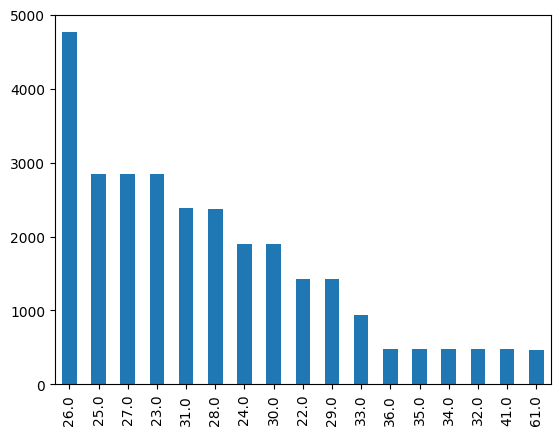

In [80]:
train_speaker_ages.value_counts().plot.bar()

# Let's use class_weight="balanced" to tackle the class imbalance issue 
# Also let's use weighted_avg metric (and F1) since it is a reliable metric when 
# class imbalance issue is there

In [81]:
print("Classifier = LogisticRegression")
p1.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, p1.predict(valid_X)))

print("Classifier = SVC (linear)")
p2.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, p2.predict(valid_X)))

print("Classifier = SVC (rbf)")
p3.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, p3.predict(valid_X)))

print("Classifier = RandomForestClassifier")
p4.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, p4.predict(valid_X)))

print("Classifier = KNeighborsClassifier")
p5.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, p5.predict(valid_X)))

# Conslusion after running:
# best algo gives weighted avg = 0.24 (knn)

Classifier = LogisticRegression


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision

              precision    recall  f1-score   support

        22.0       0.19      0.22      0.21        36
        23.0       0.31      0.06      0.10        71
        24.0       0.12      0.04      0.06        46
        25.0       0.00      0.00      0.00        79
        26.0       0.18      0.24      0.20       115
        27.0       0.23      0.23      0.23        81
        28.0       0.08      0.03      0.05        60
        29.0       0.00      0.00      0.00        45
        30.0       0.00      0.00      0.00        48
        31.0       0.11      0.23      0.15        65
        32.0       0.17      0.36      0.24        11
        33.0       0.05      0.10      0.07        30
        34.0       0.08      0.18      0.11        11
        35.0       1.00      0.27      0.43        11
        36.0       0.04      0.75      0.07         8
        41.0       0.12      0.07      0.09        14
        61.0       0.00      0.00      0.00        19

    accuracy              

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        22.0       0.07      0.36      0.12        36
        23.0       0.17      0.06      0.09        71
        24.0       0.13      0.07      0.09        46
        25.0       0.00      0.00      0.00        79
        26.0       0.50      0.02      0.03       115
        27.0       0.20      0.28      0.23        81
        28.0       0.29      0.03      0.06        60
        29.0       0.00      0.00      0.00        45
        30.0       0.00      0.00      0.00        48
        31.0       0.00      0.00      0.00        65
        32.0       0.07      0.55      0.13        11
        33.0       0.11      0.23      0.15        30
        34.0       0.10      0.18      0.13        11
        35.0       0.50      0.18      0.27        11
        36.0       0.02      0.62      0.05         8
        41.0       0.12      0.07      0.09        14
        61.0       1.00      0.11      0.19        19

    accuracy              

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        22.0       0.00      0.00      0.00        36
        23.0       0.00      0.00      0.00        71
        24.0       0.00      0.00      0.00        46
        25.0       0.00      0.00      0.00        79
        26.0       0.00      0.00      0.00       115
        27.0       0.11      1.00      0.19        81
        28.0       0.00      0.00      0.00        60
        29.0       0.00      0.00      0.00        45
        30.0       0.00      0.00      0.00        48
        31.0       0.00      0.00      0.00        65
        32.0       0.00      0.00      0.00        11
        33.0       0.00      0.00      0.00        30
        34.0       0.00      0.00      0.00        11
        35.0       0.00      0.00      0.00        11
        36.0       0.00      0.00      0.00         8
        41.0       0.00      0.00      0.00        14
        61.0       0.00      0.00      0.00        19

    accuracy              

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        22.0       0.00      0.00      0.00        36
        23.0       0.13      0.07      0.09        71
        24.0       0.08      0.07      0.07        46
        25.0       0.05      0.03      0.03        79
        26.0       0.16      0.25      0.20       115
        27.0       0.10      0.22      0.14        81
        28.0       0.11      0.15      0.13        60
        29.0       0.05      0.02      0.03        45
        30.0       0.05      0.02      0.03        48
        31.0       0.08      0.08      0.08        65
        32.0       0.03      0.09      0.05        11
        33.0       0.25      0.07      0.11        30
        34.0       0.00      0.00      0.00        11
        35.0       0.25      0.09      0.13        11
        36.0       0.00      0.00      0.00         8
        41.0       0.00      0.00      0.00        14
        61.0       0.09      0.11      0.10        19

    accuracy              

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# now let's check if we do not do feature scaling would
# it improve the performance

speaker_age_pipe_knn = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])
speaker_age_pipe_knn.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, speaker_age_pipe_knn.predict(valid_X)))

# Conslusion after running 
# Weighted avg IMPROVED ==> Therefore let's use without scaling
# Current best weighte avg = 0.30 (speaker_age_pipe_knn)

              precision    recall  f1-score   support

        22.0       0.33      0.31      0.32        36
        23.0       0.19      0.25      0.21        71
        24.0       0.20      0.46      0.28        46
        25.0       0.31      0.14      0.19        79
        26.0       0.29      0.30      0.30       115
        27.0       0.51      0.37      0.43        81
        28.0       0.26      0.43      0.33        60
        29.0       0.39      0.40      0.40        45
        30.0       0.25      0.15      0.18        48
        31.0       0.37      0.17      0.23        65
        32.0       0.18      0.55      0.27        11
        33.0       0.45      0.43      0.44        30
        34.0       0.23      0.45      0.30        11
        35.0       0.86      0.55      0.67        11
        36.0       1.00      0.25      0.40         8
        41.0       0.50      0.07      0.12        14
        61.0       0.80      0.21      0.33        19

    accuracy              

#### Hyperparameter tuning

In [83]:
# Based on the above outputs KNeighborsClassifier() performs better
# Now let's check what hyperparameters performs better

param_dist = {
    'classifier__n_neighbors': np.arange(1, 21),  
    'classifier__weights': ['uniform', 'distance'],  
    'classifier__p': [1, 2]  # Options for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(speaker_age_pipe_knn, param_distributions=param_dist, n_iter=50, cv=3, scoring='balanced_accuracy', random_state=42, verbose=3)

In [84]:
random_search.fit(train_X, train_speaker_ages)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=uniform;, score=0.377 total time=   3.1s
[CV 2/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=uniform;, score=0.436 total time=   2.7s
[CV 3/3] END classifier__n_neighbors=8, classifier__p=2, classifier__weights=uniform;, score=0.389 total time=   2.8s
[CV 1/3] END classifier__n_neighbors=1, classifier__p=1, classifier__weights=uniform;, score=0.417 total time=  25.4s
[CV 2/3] END classifier__n_neighbors=1, classifier__p=1, classifier__weights=uniform;, score=0.491 total time=  27.6s
[CV 3/3] END classifier__n_neighbors=1, classifier__p=1, classifier__weights=uniform;, score=0.442 total time=  24.5s
[CV 1/3] END classifier__n_neighbors=6, classifier__p=2, classifier__weights=uniform;, score=0.379 total time=   2.9s
[CV 2/3] END classifier__n_neighbors=6, classifier__p=2, classifier__weights=uniform;, score=0.441 total time=  

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('classifier',
                                              KNeighborsClassifier())]),
                   n_iter=50,
                   param_distributions={'classifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'classifier__p': [1, 2],
                                        'classifier__weights': ['uniform',
                                                                'distance']},
                   random_state=42, scoring='balanced_accuracy', verbose=3)

In [85]:
best_params = random_search.best_params_
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Output
# Best Hyperparameters:
# classifier__weights: uniform
# classifier__p: 1
# classifier__n_neighbors: 1

Best Hyperparameters:
classifier__weights: uniform
classifier__p: 1
classifier__n_neighbors: 1


In [87]:
# Let's run a pipeline with the best hyperparas as well.
best_classifier__weights = "uniform"
best_classifier__p = 1
best_classifier__n_neighbors = 1

best_speaker_age_knn = Pipeline([
    ('classifier', KNeighborsClassifier(p=best_classifier__p, n_neighbors=best_classifier__n_neighbors, weights=best_classifier__weights))
])

best_speaker_age_knn.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, best_speaker_age_knn.predict(valid_X)))

# Conclusion after runing:
# weighted avg DROPPED
# Current best weighte avg = 0.30 (speaker_age_knn)

              precision    recall  f1-score   support

        22.0       0.32      0.19      0.24        36
        23.0       0.16      0.11      0.13        71
        24.0       0.14      0.33      0.19        46
        25.0       0.18      0.13      0.15        79
        26.0       0.24      0.17      0.19       115
        27.0       0.40      0.28      0.33        81
        28.0       0.19      0.43      0.27        60
        29.0       0.30      0.24      0.27        45
        30.0       0.23      0.15      0.18        48
        31.0       0.29      0.17      0.21        65
        32.0       0.13      0.45      0.20        11
        33.0       0.22      0.33      0.27        30
        34.0       0.14      0.36      0.20        11
        35.0       0.36      0.36      0.36        11
        36.0       0.00      0.00      0.00         8
        41.0       0.50      0.07      0.12        14
        61.0       0.67      0.11      0.18        19

    accuracy              

In [88]:
# Now let's check what feature engineering technique would be better

speaker_age_pipe_pca_knn = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('classifier', KNeighborsClassifier(weights="uniform", p=1, n_neighbors=1))
    ])

print("just pca:")
speaker_age_pipe_pca_knn.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, speaker_age_pipe_pca_knn.predict(valid_X)))

print("scaling + pca:")
speaker_age_pipe_scaler_pca_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', KNeighborsClassifier(weights="uniform", p=1, n_neighbors=1))
    ])

speaker_age_pipe_scaler_pca_knn.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, speaker_age_pipe_scaler_pca_knn.predict(valid_X)))

# Conclusion: Both DROPPED the weighted avg score

scaling + pca:
              precision    recall  f1-score   support

        22.0       0.17      0.11      0.13        36
        23.0       0.15      0.15      0.15        71
        24.0       0.22      0.39      0.28        46
        25.0       0.28      0.09      0.13        79
        26.0       0.32      0.19      0.24       115
        27.0       0.32      0.23      0.27        81
        28.0       0.17      0.32      0.22        60
        29.0       0.17      0.22      0.19        45
        30.0       0.26      0.31      0.28        48
        31.0       0.21      0.18      0.20        65
        32.0       0.20      0.45      0.28        11
        33.0       0.21      0.33      0.26        30
        34.0       0.16      0.45      0.23        11
        35.0       0.30      0.27      0.29        11
        36.0       0.00      0.00      0.00         8
        41.0       0.33      0.07      0.12        14
        61.0       1.00      0.21      0.35        19

    accurac

In [89]:
# Pipleline for speaker age prediction with Model-based feature reduction
speaker_age_pipe_sfmlr_knn = Pipeline([
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier(weights="uniform", p=1, n_neighbors=1))
])

print("just model-based feature reduction:")
speaker_age_pipe_sfmlr_knn.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, speaker_age_pipe_sfmlr_knn.predict(valid_X)))

speaker_age_pipe_scaler_sfmlr_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier(weights="uniform", p=1, n_neighbors=1))
])

print("scaling + model-based feature reduction:")
speaker_age_pipe_scaler_sfmlr_knn.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, speaker_age_pipe_scaler_sfmlr_knn.predict(valid_X)))

# Conslusion
# Both did not improve the weighted avg score 

just model-based feature reduction:
              precision    recall  f1-score   support

        22.0       0.00      0.00      0.00        36
        23.0       0.06      0.03      0.04        71
        24.0       0.08      0.07      0.07        46
        25.0       0.13      0.05      0.07        79
        26.0       0.26      0.12      0.17       115
        27.0       0.32      0.12      0.18        81
        28.0       0.09      0.17      0.12        60
        29.0       0.08      0.04      0.06        45
        30.0       0.07      0.17      0.10        48
        31.0       0.12      0.17      0.14        65
        32.0       0.14      0.09      0.11        11
        33.0       0.06      0.07      0.06        30
        34.0       0.15      0.18      0.17        11
        35.0       0.04      0.18      0.06        11
        36.0       0.00      0.00      0.00         8
        41.0       0.00      0.00      0.00        14
        61.0       0.27      0.21      0.24  

In [90]:
# Just for the checking purpose let's check the same pipelines but with SVC classifier as well (It should give lower weighted_avg than KNN classifier counterparts)

speaker_age_pipe_scaler_pca_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', SVC(class_weight='balanced'))
    ])

print("scaling + PCA + SVC")
speaker_age_pipe_scaler_pca_svc.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, speaker_age_pipe_scaler_pca_svc.predict(valid_X)))

speaker_age_pipe_scaler_sfmlr_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', SVC(class_weight='balanced'))
])

print("scaling + model-based feature reduction + SVC")
speaker_age_pipe_scaler_sfmlr_svc.fit(train_X, train_speaker_ages)
print(classification_report(valid_speaker_ages, speaker_age_pipe_scaler_sfmlr_svc.predict(valid_X)))

# Conclusion
# Both did not imrpve weighted avg as expected

scaling + PCA + SVC


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        22.0       0.00      0.00      0.00        36
        23.0       0.00      0.00      0.00        71
        24.0       0.00      0.00      0.00        46
        25.0       0.00      0.00      0.00        79
        26.0       0.00      0.00      0.00       115
        27.0       0.11      1.00      0.19        81
        28.0       0.00      0.00      0.00        60
        29.0       0.00      0.00      0.00        45
        30.0       0.00      0.00      0.00        48
        31.0       0.00      0.00      0.00        65
        32.0       0.00      0.00      0.00        11
        33.0       0.00      0.00      0.00        30
        34.0       0.00      0.00      0.00        11
        35.0       0.00      0.00      0.00        11
        36.0       0.00      0.00      0.00         8
        41.0       0.00      0.00      0.00        14
        61.0       0.00      0.00      0.00        19

    accuracy              

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prediction on test data

In [91]:
test_X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.124623,0.196628,0.257004,-0.156045,-0.054916,0.006071,-0.035149,-0.092019,-0.196302,0.077971,...,-0.221466,0.140292,0.123622,-0.175572,-0.107030,-0.087621,-0.026501,0.139337,-0.083030,0.059507
1,0.109655,0.170158,0.227644,-0.127088,-0.044476,-0.046852,-0.090026,-0.061321,-0.227288,0.066863,...,-0.204930,0.110203,0.085665,-0.286787,-0.113195,-0.057312,-0.055680,0.143939,-0.045760,0.106113
2,0.014854,0.030051,0.115092,-0.017179,0.002720,-0.011692,-0.078855,-0.042991,-0.096283,0.042701,...,-0.032937,0.075821,0.030987,-0.149850,-0.003155,-0.010207,-0.001427,0.000934,-0.017069,0.048123
3,0.196893,0.113314,0.352175,-0.108499,-0.064472,-0.073239,-0.086402,0.008671,-0.342217,0.104941,...,-0.255167,0.096579,0.069413,-0.215386,-0.075168,-0.035071,-0.023375,0.067768,-0.181530,0.174444
4,0.033004,0.013373,0.124001,-0.016143,0.010120,0.010635,-0.055789,-0.036282,-0.059422,0.060278,...,-0.035814,0.093764,0.027321,-0.116009,0.010096,-0.042293,0.005347,0.007722,-0.007731,0.058799


In [93]:
# Let's use best performing pipeline to make predictions for the test data
pred_speaker_ages_test = speaker_age_pipe_knn.predict(test_X)
print(pred_speaker_ages_test.shape)

(744,)


In [94]:
pred_speaker_age_test = pd.DataFrame(pred_speaker_ages_test, columns=['label_2'])
pred_speaker_age_test.head()

,label_2
0,22.0
1,25.0
2,30.0
3,27.0
4,29.0


In [95]:
pred_test.head() # pred_test was already created (when doing prediction of speaker_ID)

,ID,label_1
0,1,26
1,2,18
2,3,16
3,4,7
4,5,58


In [96]:
if "label_2" not in pred_test.columns:
    pred_test.insert(2, "label_2", pred_speaker_age_test['label_2'])
else:
    print(f"Column : label_2 already exists")

In [97]:
pred_test.head()

,ID,label_1,label_2
0,1,26,22.0
1,2,18,25.0
2,3,16,30.0
3,4,7,27.0
4,5,58,29.0


## For speaker_gender

<Axes: >

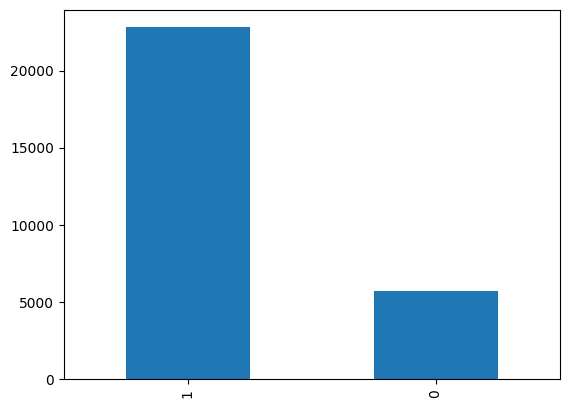

In [99]:
train_df.speaker_gender.value_counts().plot.bar()

### Training

In [100]:
#  Note: 
# There is a class imbalance issue in speaker_gender values. As a solution we can use class_weight='balanced' parameter.
# And will  use weighted avg metric when taking desicions 

#Let's choose a good classifer

speaker_gender_scaler_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight="balanced"))
])

speaker_gender_scaler_svc_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight="balanced", kernel='linear'))
])

speaker_gender_scaler_svc_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight="balanced", kernel='rbf'))
])

speaker_gender_rfc = Pipeline([
    ('classifier', RandomForestClassifier(class_weight="balanced"))
])

speaker_gender_scaler_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [101]:
print("Classifier = LogisticRegression")
speaker_gender_scaler_lr.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_scaler_lr.predict(valid_X)))

print("Classifier = SVC (linear)")
speaker_gender_scaler_svc_linear.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_scaler_svc_linear.predict(valid_X)))

print("Classifier = SVC (rbf)")
speaker_gender_scaler_svc_rbf.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_scaler_svc_rbf.predict(valid_X)))

print("Classifier = RandomForestClassifier")
speaker_gender_rfc.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_rfc.predict(valid_X)))

print("Classifier = KNeighborsClassifier")
speaker_gender_scaler_knn.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_scaler_knn.predict(valid_X)))

# Conslusion after running:
# weighted avg of Logistic Regression (pipename=speaker_gender_scaler_lr)  was the highest (0.82)

Classifier = LogisticRegression


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.70      0.34      0.45       142
           1       0.86      0.97      0.91       608

    accuracy                           0.85       750
   macro avg       0.78      0.65      0.68       750
weighted avg       0.83      0.85      0.82       750

Classifier = SVC (linear)
              precision    recall  f1-score   support

           0       0.42      0.81      0.55       142
           1       0.94      0.74      0.83       608

    accuracy                           0.75       750
   macro avg       0.68      0.77      0.69       750
weighted avg       0.84      0.75      0.78       750

Classifier = SVC (rbf)


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.81      1.00      0.90       608

    accuracy                           0.81       750
   macro avg       0.41      0.50      0.45       750
weighted avg       0.66      0.81      0.73       750

Classifier = RandomForestClassifier


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.81      1.00      0.90       608

    accuracy                           0.81       750
   macro avg       0.41      0.50      0.45       750
weighted avg       0.66      0.81      0.73       750

Classifier = KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.41      0.68      0.51       142
           1       0.91      0.77      0.84       608

    accuracy                           0.75       750
   macro avg       0.66      0.72      0.67       750
weighted avg       0.82      0.75      0.77       750



In [102]:
# now let's check if we do not do feature scaling would
# it improve the performance

speaker_gender_pipe_lr = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight="balanced"))
])
speaker_gender_pipe_lr.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_pipe_lr.predict(valid_X)))

# Conslusion after running 
# Weighted avg IMPROVED to 0.88 ==> therefore let's not keep the feature scaling

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       142
           1       0.92      0.95      0.93       608

    accuracy                           0.89       750
   macro avg       0.83      0.79      0.81       750
weighted avg       0.88      0.89      0.88       750



C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Now let's check what feature engineering technique would be better

speaker_gender_pipe_pca_knn = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(class_weight="balanced"))
    ])

print("just pca:")
speaker_gender_pipe_pca_knn.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_pipe_pca_knn.predict(valid_X)))

print("scaling + pca:")
speaker_gender_pipe_scaler_pca_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(class_weight="balanced"))
    ])

speaker_gender_pipe_scaler_pca_knn.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_pipe_scaler_pca_knn.predict(valid_X)))

# Conclusion: jsut PCA gave the same weighted avg ==> Let's try to hyperparameter tune it

just pca:
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       142
           1       0.97      0.87      0.92       608

    accuracy                           0.87       750
   macro avg       0.79      0.87      0.82       750
weighted avg       0.90      0.87      0.88       750

scaling + pca:
              precision    recall  f1-score   support

           0       0.56      0.68      0.62       142
           1       0.92      0.88      0.90       608

    accuracy                           0.84       750
   macro avg       0.74      0.78      0.76       750
weighted avg       0.85      0.84      0.85       750



C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# Pipleline for speaker age prediction with Model-based feature reduction
speaker_gender_pipe_sfmlr_knn = Pipeline([
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier(weights="uniform", p=1, n_neighbors=1))
])

print("just model-based feature reduction:")
speaker_gender_pipe_sfmlr_knn.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_pipe_sfmlr_knn.predict(valid_X)))

speaker_gender_pipe_scaler_sfmlr_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier(weights="uniform", p=1, n_neighbors=1))
])

print("scaling + model-based feature reduction:")
speaker_gender_pipe_scaler_sfmlr_knn.fit(train_X, train_speaker_genders)
print(classification_report(valid_speaker_genders, speaker_gender_pipe_scaler_sfmlr_knn.predict(valid_X)))

# Conslusion
# Both did not improve the weighted avg score 

just model-based feature reduction:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51       142
           1       0.89      0.87      0.88       608

    accuracy                           0.80       750
   macro avg       0.68      0.70      0.69       750
weighted avg       0.81      0.80      0.81       750

scaling + model-based feature reduction:
              precision    recall  f1-score   support

           0       0.59      0.30      0.40       142
           1       0.85      0.95      0.90       608

    accuracy                           0.83       750
   macro avg       0.72      0.63      0.65       750
weighted avg       0.80      0.83      0.81       750



#### Hyperparameter tuning

In [122]:
param_grid = {
    'pca__n_components': [0.90, 0.95, 0.99],  # Variance retained by PCA
}

grid_search = GridSearchCV(estimator=speaker_gender_pipe_pca_knn, param_grid=param_grid, scoring='balanced_accuracy', cv=3, n_jobs=-1, verbose=3)


In [123]:
grid_search.fit(train_X, train_speaker_genders)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.95)),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1, param_grid={'pca__n_components': [0.9, 0.95, 0.99]},
             scoring='balanced_accuracy', verbose=3)

In [ ]:
print("Best Hyperparameters: ", grid_search.best_params_)

### Prediction on test data

In [124]:
best_speaker_gender_pipe = speaker_gender_pipe_lr
pred_speaker_genders_test = best_speaker_gender_pipe.predict(test_X)
print(pred_speaker_genders_test.shape)

(744,)


In [125]:
pred_speaker_genders_test = pd.DataFrame(pred_speaker_genders_test, columns=['label_3'])
pred_speaker_genders_test.head()

,label_3
0,0
1,1
2,1
3,1
4,0


In [126]:
pred_test.head() # pred_test was already created (when doing prediction of speaker_ID)

,ID,label_1,label_2
0,1,26,22.0
1,2,18,25.0
2,3,16,30.0
3,4,7,27.0
4,5,58,29.0


In [127]:
if "label_3" not in pred_test.columns:
    pred_test.insert(3, "label_3", pred_speaker_genders_test['label_3'])
else:
    print(f"Column : label_3 already exists")

In [128]:
pred_test.head()

,ID,label_1,label_2,label_3
0,1,26,22.0,0
1,2,18,25.0,1
2,3,16,30.0,1
3,4,7,27.0,1
4,5,58,29.0,0


## For speaker_accent

<Axes: >

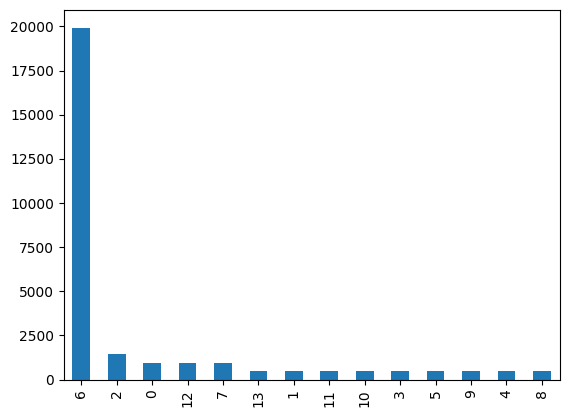

In [129]:
train_df.speaker_accent.value_counts().plot.bar()

### Training

In [130]:
#  Note: 
# There is a class imbalance issue in speaker_accent values. As a solution we can use class_weight='balanced' parameter.
# And will  use weighted avg metric when taking desicions 

#Let's choose a good classifer

speaker_accent_scaler_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight="balanced"))
])

speaker_accent_scaler_svc_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight="balanced", kernel='linear'))
])

speaker_accent_scaler_svc_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(class_weight="balanced", kernel='rbf'))
])

speaker_accent_rfc = Pipeline([
    ('classifier', RandomForestClassifier(class_weight="balanced"))
])

speaker_accent_scaler_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [131]:
print("Classifier = LogisticRegression")
speaker_accent_scaler_lr.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_scaler_lr.predict(valid_X)))

print("Classifier = SVC (linear)")
speaker_accent_scaler_svc_linear.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_scaler_svc_linear.predict(valid_X)))

print("Classifier = SVC (rbf)")
speaker_accent_scaler_svc_rbf.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_scaler_svc_rbf.predict(valid_X)))

print("Classifier = RandomForestClassifier")
speaker_accent_rfc.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_rfc.predict(valid_X)))

print("Classifier = KNeighborsClassifier")
speaker_accent_scaler_knn.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_scaler_knn.predict(valid_X)))

# Conslusion after running:
# weighted avg of KNN was the best: 0.62       

Classifier = LogisticRegression


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.02      0.91      0.03        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.03      0.18      0.06        11
           6       0.90      0.02      0.03       532
           7       0.07      0.09      0.08        32
           8       0.00      0.00      0.00        19
           9       0.42      0.29      0.34        17
          10       0.00      0.00      0.00        10
          11       1.00      0.45      0.62        11
          12       0.08      0.08      0.08        26
          13       0.03      0.10      0.05        10

    accuracy                           0.05       750
   macro avg       0.18      0.15      0.09       750
weighted avg       0.67      0.05      0.05       750

Classifier = SVC (linear)

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.06      0.10      0.08        21
           1       0.03      0.91      0.06        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.10      0.36      0.16        11
           6       0.00      0.00      0.00       532
           7       0.05      0.12      0.07        32
           8       1.00      0.05      0.10        19
           9       0.07      0.41      0.13        17
          10       0.00      0.00      0.00        10
          11       0.67      0.18      0.29        11
          12       0.17      0.04      0.06        26
          13       0.03      0.50      0.05        10

    accuracy                           0.05       750
   macro avg       0.16      0.19      0.07       750
weighted avg       0.05      0.05      0.02       750

Classifier = SVC (rbf)


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        11
           6       0.71      1.00      0.83       532
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        10

    accuracy                           0.71       750
   macro avg       0.05      0.07      0.06       750
weighted avg       0.50      0.71      0.59       750

Classifier = RandomForest

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        11
           6       0.71      1.00      0.83       532
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        10

    accuracy                           0.71       750
   macro avg       0.05      0.07      0.06       750
weighted avg       0.50      0.71      0.59       750

Classifier = KNeighborsCl

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
# Let's now check whether the feature sclaing helps the weighted svg score or not

speaker_accent_knn = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

print("Classifier = SVC (linear) without feature scaling")
speaker_accent_knn.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_knn.predict(valid_X)))

# Conclusion
# weighted avg IMPROVED : 0.64 (from 0.62)

Classifier = SVC (linear) without feature scaling
              precision    recall  f1-score   support

           0       0.21      0.38      0.27        21
           1       0.67      0.18      0.29        11
           2       0.27      0.11      0.16        27
           3       1.00      0.38      0.55         8
           4       0.33      0.20      0.25        15
           5       0.26      0.55      0.35        11
           6       0.77      0.84      0.80       532
           7       0.23      0.09      0.13        32
           8       0.00      0.00      0.00        19
           9       0.15      0.12      0.13        17
          10       0.23      0.30      0.26        10
          11       0.86      0.55      0.67        11
          12       0.21      0.23      0.22        26
          13       1.00      0.30      0.46        10

    accuracy                           0.66       750
   macro avg       0.44      0.30      0.32       750
weighted avg       0.64      0

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Hyperparameter tuning

In [133]:
param_dist = {
    'classifier__n_neighbors': range(1, 21),  # Number of neighbors to consider
    'classifier__weights': ['uniform', 'distance'],  # Weighting method
    'classifier__p': [1, 2],  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

random_search = RandomizedSearchCV(
    estimator=speaker_accent_knn,  # Your pipeline
    param_distributions=param_dist,  # The hyperparameters to search over
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='balanced_accuracy',  # You can use other scoring metrics if needed
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=3
)

In [134]:
random_search.fit(train_X, train_speaker_accents)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [110]:
print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'classifier__C': 0.01, 'classifier__gamma': 0.01}


In [ ]:
# the best weighted avg as of now: 0.64 (speaker_accent_knn)

In [135]:
# Now let's check what feature engineering technique would be better

speaker_accent_pipe_pca_knn = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('classifier', KNeighborsClassifier())
    ])

print("just pca:")
speaker_accent_pipe_pca_knn.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_pipe_pca_knn.predict(valid_X)))

print("scaling + pca:")
speaker_accent_pipe_scaler_pca_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', KNeighborsClassifier())
    ])

speaker_accent_pipe_scaler_pca_knn.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_pipe_scaler_pca_knn.predict(valid_X)))

# Conclusion: jsut PCA gave the same weighted avg ==> Let's try to hyperparameter tune it

just pca:
              precision    recall  f1-score   support

           0       0.16      0.38      0.22        21
           1       1.00      0.09      0.17        11
           2       0.40      0.15      0.22        27
           3       1.00      0.38      0.55         8
           4       0.15      0.20      0.17        15
           5       0.16      0.27      0.20        11
           6       0.76      0.82      0.79       532
           7       0.14      0.06      0.09        32
           8       0.00      0.00      0.00        19
           9       0.14      0.12      0.13        17
          10       0.19      0.30      0.23        10
          11       0.86      0.55      0.67        11
          12       0.44      0.27      0.33        26
          13       1.00      0.30      0.46        10

    accuracy                           0.64       750
   macro avg       0.46      0.28      0.30       750
weighted avg       0.64      0.64      0.62       750

scaling + pca:


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
# Pipleline for speaker age prediction with Model-based feature reduction
speaker_accent_pipe_sfmlr_knn = Pipeline([
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier())
])

print("just model-based feature reduction:")
speaker_accent_pipe_sfmlr_knn.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_pipe_sfmlr_knn.predict(valid_X)))

speaker_accent_pipe_scaler_sfmlr_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('classifier', KNeighborsClassifier())
])

print("scaling + model-based feature reduction:")
speaker_accent_pipe_scaler_sfmlr_knn.fit(train_X, train_speaker_accents)
print(classification_report(valid_speaker_accents, speaker_accent_pipe_scaler_sfmlr_knn.predict(valid_X)))

# Conslusion
# Both did not improve the weighted avg score 

just model-based feature reduction:


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.19      0.14      0.16        21
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.20      0.25      0.22         8
           4       0.30      0.20      0.24        15
           5       0.06      0.09      0.07        11
           6       0.74      0.90      0.82       532
           7       0.50      0.16      0.24        32
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        17
          10       0.33      0.10      0.15        10
          11       0.33      0.27      0.30        11
          12       0.17      0.08      0.11        26
          13       0.14      0.10      0.12        10

    accuracy                           0.67       750
   macro avg       0.21      0.16      0.17       750
weighted avg       0.58      0.67      0.61       750

scaling + model-based fea

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prediction test data

In [137]:
test_X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.124623,0.196628,0.257004,-0.156045,-0.054916,0.006071,-0.035149,-0.092019,-0.196302,0.077971,...,-0.221466,0.140292,0.123622,-0.175572,-0.107030,-0.087621,-0.026501,0.139337,-0.083030,0.059507
1,0.109655,0.170158,0.227644,-0.127088,-0.044476,-0.046852,-0.090026,-0.061321,-0.227288,0.066863,...,-0.204930,0.110203,0.085665,-0.286787,-0.113195,-0.057312,-0.055680,0.143939,-0.045760,0.106113
2,0.014854,0.030051,0.115092,-0.017179,0.002720,-0.011692,-0.078855,-0.042991,-0.096283,0.042701,...,-0.032937,0.075821,0.030987,-0.149850,-0.003155,-0.010207,-0.001427,0.000934,-0.017069,0.048123
3,0.196893,0.113314,0.352175,-0.108499,-0.064472,-0.073239,-0.086402,0.008671,-0.342217,0.104941,...,-0.255167,0.096579,0.069413,-0.215386,-0.075168,-0.035071,-0.023375,0.067768,-0.181530,0.174444
4,0.033004,0.013373,0.124001,-0.016143,0.010120,0.010635,-0.055789,-0.036282,-0.059422,0.060278,...,-0.035814,0.093764,0.027321,-0.116009,0.010096,-0.042293,0.005347,0.007722,-0.007731,0.058799


In [138]:
pred_speaker_accents_test = speaker_accent_knn.predict(test_X)
print(pred_speaker_accents_test.shape)

(744,)


In [139]:
pred_speaker_accents_test = pd.DataFrame(pred_speaker_accents_test, columns=['label_4'])
pred_speaker_accents_test.head()

,label_4
0,2
1,8
2,6
3,6
4,6


In [140]:
pred_test.head() # pred_test was already created (when doing prediction of speaker_ID)


,ID,label_1,label_2,label_3
0,1,26,22.0,0
1,2,18,25.0,1
2,3,16,30.0,1
3,4,7,27.0,1
4,5,58,29.0,0


In [141]:
if "label_4" not in pred_test.columns:
    pred_test.insert(4, "label_4", pred_speaker_accents_test['label_4'])
else:
    print(f"Column : label_4 already exists")

In [142]:
pred_test.head()

,ID,label_1,label_2,label_3,label_4
0,1,26,22.0,0,2
1,2,18,25.0,1,8
2,3,16,30.0,1,6
3,4,7,27.0,1,6
4,5,58,29.0,0,6


In [144]:
pred_test_layer7 = pred_test
pred_test_layer7.head() 

,ID,label_1,label_2,label_3,label_4
0,1,26,22.0,0,2
1,2,18,25.0,1,8
2,3,16,30.0,1,6
3,4,7,27.0,1,6
4,5,58,29.0,0,6


In [145]:
pred_test_layer7.to_csv('2 - 190290U_pred_test_layer12.csv', index=False)

In [ ]:
# #################### RUN BELOW FOR THE BEST MODEL ####################

# # After grid search is complete, save the best estimator
# best_svm = grid_search.best_estimator_

# # You can also save the best hyperparameters
# best_params = grid_search.best_params_

# # Now, you can use the best estimator for making predictions or further operations
# y_pred = best_svm.predict(X_validation)  # Example: Using it for predictions on validation data

# # If you want to create a new instance of the model with the best hyperparameters
# svm_with_best_params = SVC(**best_params)
# svm_with_best_params.fit(X_train, y_train)  # Train the new model


In [ ]:
# all other labels (age, gender, accent) have class imbalance problem. So account for that -> I think cv parameter in grid search cv can be used for that
# read about it ==> https://scikit-learn.org/stable/modules/cross_validation.html (Cross validation)
# This is vital because, we cannot track the model performance using a single metric
# if cv is given an integer value, it will use stratified k fold cross validation




In [ ]:
# TSNE : feature rection technique

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# # Define a range of hyperparameters and their distributions for random search
# param_dist = {
#     'clf__C': uniform(loc=0.1, scale=10),  # Regularization parameter (uniform distribution)
#     'clf__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
# }

# # Create a random search object
# random_search = RandomizedSearchCV(estimator=speaker_ID_pipe_scaler_svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params_random = random_search.best_params_
# best_accuracy_random = random_search.best_score_

# print("Best Hyperparameters (Random Search):", best_params_random)
# print("Best Accuracy (Random Search):", best_accuracy_random)


In [ ]:
# code to compare different pipelines

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load a sample dataset (Iris dataset in this example)
# data = load_iris()
# X, y = data.data, data.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a common feature scaling pipeline
# common_preprocessing = Pipeline([
#     ('scaler', StandardScaler())
# ])

# # Define pipelines with different feature reduction techniques on top of common preprocessing
# # You can add more as needed
# pca_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('pca', PCA(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# tsne_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('tsne', TSNE(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# selectkbest_pipe = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('SelectKBest', SelectKBest(chi2, k=10)),
#     ('clf', SVC())
# ])

# # Create a list of feature reduction pipelines for easy iteration
# feature_reduction_pipelines = [
#     ("PCA", pca_pipeline),
#     ("t-SNE", tsne_pipeline),
# ]

# # Fit and compare the performance of different feature reduction pipelines
# for name, pipeline in feature_reduction_pipelines:
#     # Fit the pipeline on the training data
#     pipeline.fit(X_train, y_train)
    
#     # Make predictions on the testing data
#     y_pred = pipeline.predict(X_test)
    
#     # Calculate and print the accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy with {name}: {accuracy:.2f}")

########################################################################################
###########So we effectively fit the scaler pipeline 2 times right? is it the case?################################
########################################################################################
########################################################################################

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load a sample dataset (Iris dataset in this example)
# data = load_iris()
# X, y = data.data, data.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a common feature scaling pipeline and fit it once
# common_preprocessing = Pipeline([
#     ('scaler', StandardScaler())
# ])

# # Fit the common preprocessing pipeline on the training data
# common_preprocessing.fit(X_train)

# # Define pipelines with different feature reduction techniques using the fitted common preprocessing
# # You can add more as needed
# pca_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('pca', PCA(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# tsne_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('tsne', TSNE(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# # Create a list of feature reduction pipelines for easy iteration
# feature_reduction_pipelines = [
#     ("PCA", pca_pipeline),
#     ("t-SNE", tsne_pipeline),
# ]

# # Fit and compare the performance of different feature reduction pipelines
# for name, pipeline in feature_reduction_pipelines:
#     # Make predictions on the testing data using the fitted common preprocessing
#     X_test_preprocessed = pipeline.named_steps['preprocessing'].transform(X_test)
#     y_pred = pipeline.named_steps['clf'].predict(X_test_preprocessed)
    
#     # Calculate and print the accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy with {name}: {accuracy:.2f}")

